<a href="https://colab.research.google.com/github/onuralpArsln/MlAiTutorialProjects/blob/main/12-VideoSources/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regresyon

# Gerekli Kütüphaneler

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Veri seti

Kaggleden aldığımız bir veri seti kullanacağız. veri seti linki https://www.kaggle.com/datasets/sohier/calcofi?select=bottle.csv

Bu su sıcaklığı ve su tuzluluğunun ilişkisini anlatan veri seti Kalforniyadan toplanan verilerden oluşur.


In [2]:
!wget -q  https://raw.githubusercontent.com/onuralpArsln/MlAiTutorialProjects/refs/heads/main/12-VideoSources/CalCOFI_reduced.csv


Verilere ilk bakışı yapalım

In [4]:
#pandas kullanarak okuma yap
df = pd.read_csv("CalCOFI_reduced.csv")

# İlk 5 satırı yazdır
print(df.head())

# Veri setindeki sütun isimlerini kontrol edelim
print(df.columns)

   Depthm  T_degC  Salnty
0       0   10.50  33.440
1       8   10.46  33.440
2      10   10.46  33.437
3      19   10.45  33.420
4      20   10.45  33.421
Index(['Depthm', 'T_degC', 'Salnty'], dtype='object')


Veri temizliği için eksik veri varmı bakalım eksik veri olan satırları sileceğiz

In [5]:
print(df.isnull().sum())

Depthm      0
T_degC    202
Salnty    875
dtype: int64


In [6]:
df = df.dropna(subset=['Depthm', 'T_degC', 'Salnty'])


In [7]:
print(df.isnull().sum())

Depthm    0
T_degC    0
Salnty    0
dtype: int64


# Isı haritası ile hızlı analiz

Bu ısı haritası (heatmap) bize, su derinliği, sıcaklık ve tuzluluk arasındaki ilişkiyi gösterir. 1’e yakın korelasyonlar güçlü ilişki olduğunu, -1’e yakın olanlar ise negatif ilişki olduğunu gösterir.

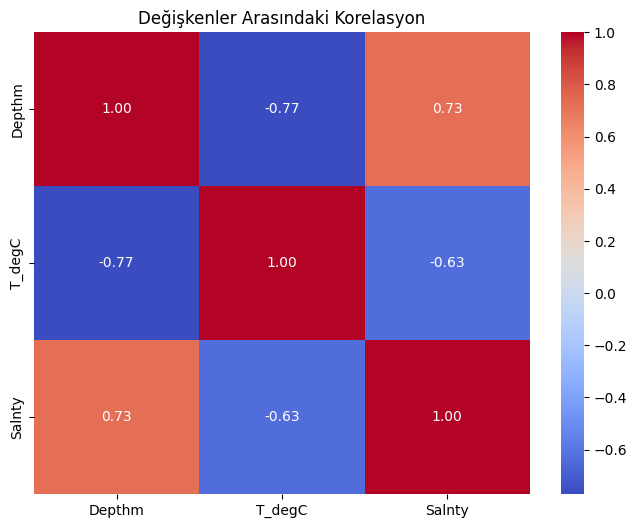

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Depthm', 'T_degC', 'Salnty']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Değişkenler Arasındaki Korelasyon")
plt.show()

# Veri Noktaları İle Analiz

İki eksende verilerimizin dağılımlarını görmek için scatterplot kullanımı

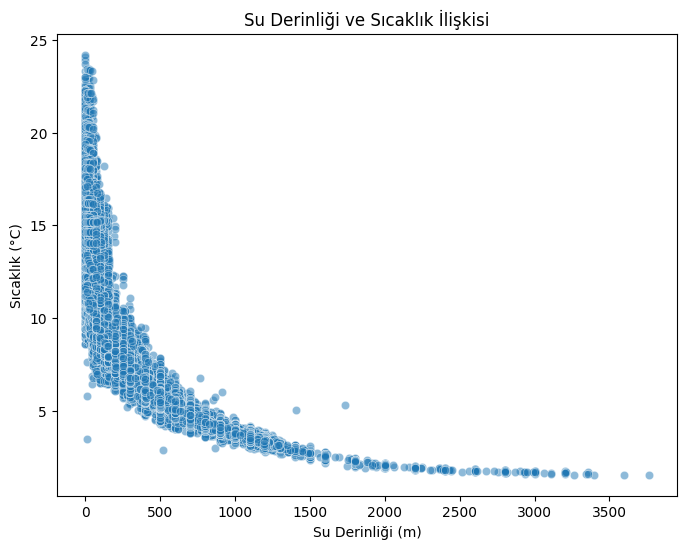

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Depthm'], y=df['T_degC'], alpha=0.5)
plt.xlabel("Su Derinliği (m)")
plt.ylabel("Sıcaklık (°C)")
plt.title("Su Derinliği ve Sıcaklık İlişkisi")
plt.show()

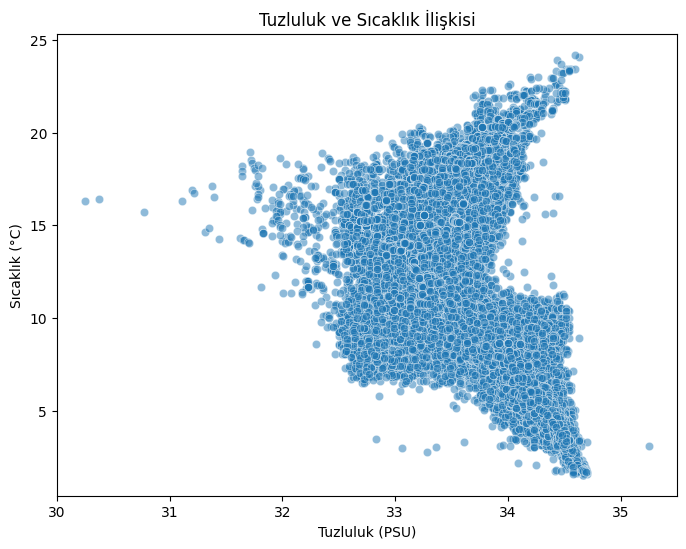

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Salnty'], y=df['T_degC'], alpha=0.5)
plt.xlabel("Tuzluluk (Practical Salinity Unit)")
plt.ylabel("Sıcaklık (°C)")
plt.title("Tuzluluk ve Sıcaklık İlişkisi")
plt.show()

# psu 0 saf su